In [46]:
#libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Data Prep/Data to Impute/final_data.csv')

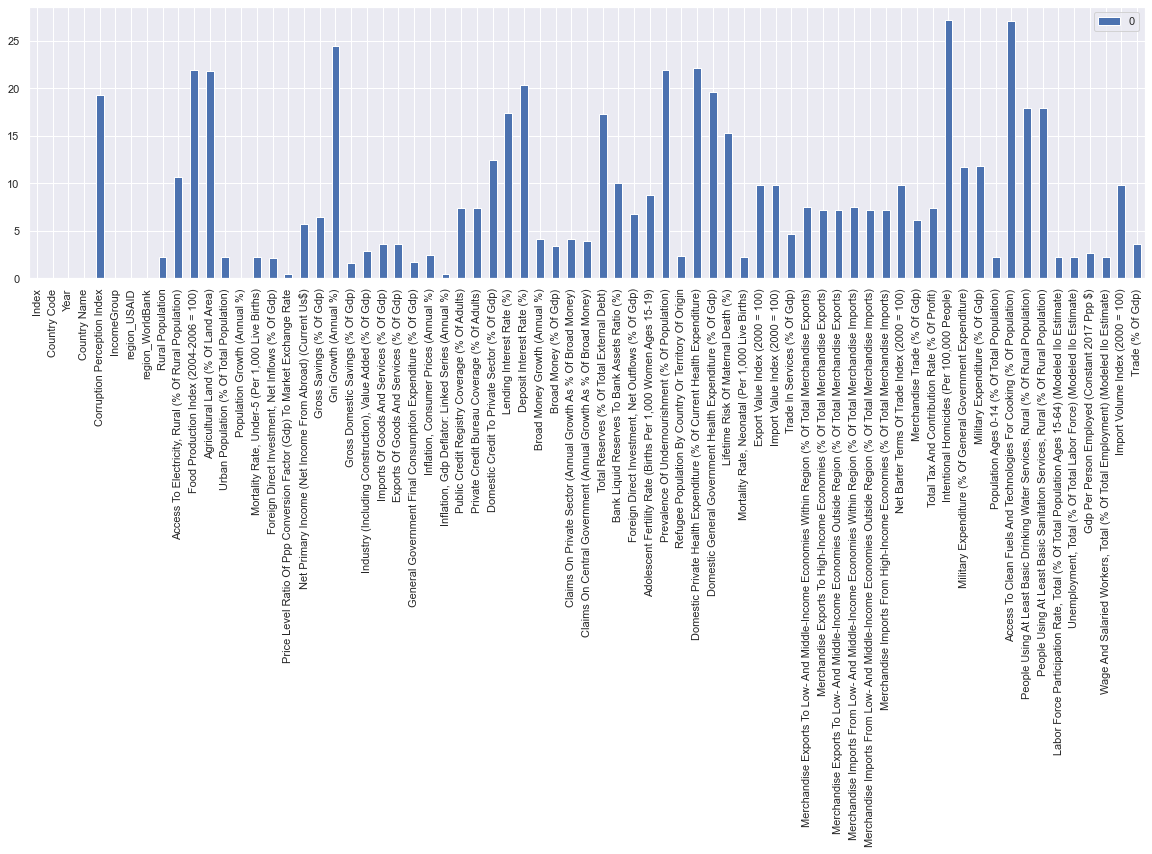

In [48]:
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

In [49]:
#df.columns

In [50]:
#pd.DataFrame(df.isnull().sum()).to_csv('check.csv')

In [51]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Gross Domestic Savings (% Of Gdp)']])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Gross Domestic Savings (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Gross Domestic Savings (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Gross Domestic Savings (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Gross Domestic Savings (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Gross Domestic Savings (% Of Gdp)'], axis = 1)

In [52]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

0.9994071448842426

In [53]:
#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

In [54]:
sample_imputeUnknown_y

array([ 34.13141447,  29.04753895,  27.77416575,  28.80977463,
        28.62214684,  27.30780467,  27.80524532,  26.45892498,
        31.27183712,  16.61392113,  16.87832646,  16.83826458,
        16.4043349 ,  17.14511051,  17.15637667,  13.00677109,
        13.00677109,  13.00677109,  13.00677109,  13.00677109,
        13.00677109,  13.00677109,  63.18333269,  62.98437684,
         3.46255932,   1.24045246,  -2.8957532 ,   1.07936664,
        61.66503707,  62.01588367,  62.13086868,  60.89991452,
        60.75918288,  17.57124576,  17.57124576,  17.57124576,
        17.57124576,  37.0979309 ,  -7.57846021,  -7.57846021,
        75.0901655 ,  68.66517405,  39.18184036,  38.81257565,
        39.99856006,  40.88021734,  40.62119296, -15.92194637,
       -15.92194637, -15.92194637, -15.92194637, -15.92194637,
       -15.92194637, -15.92194637, -15.92194637, -15.92194637,
       -15.92194637,  12.51287759,  12.51287759,  13.25083319,
        13.25083319,  12.34606329,  12.34606329,  13.63

In [55]:
len(sample_imputeUnknown_y)

67

In [56]:
df.loc[df['Gross Domestic Savings (% Of Gdp)'].isnull(), 'Gross Domestic Savings (% Of Gdp)'] = sample_imputeUnknown_y

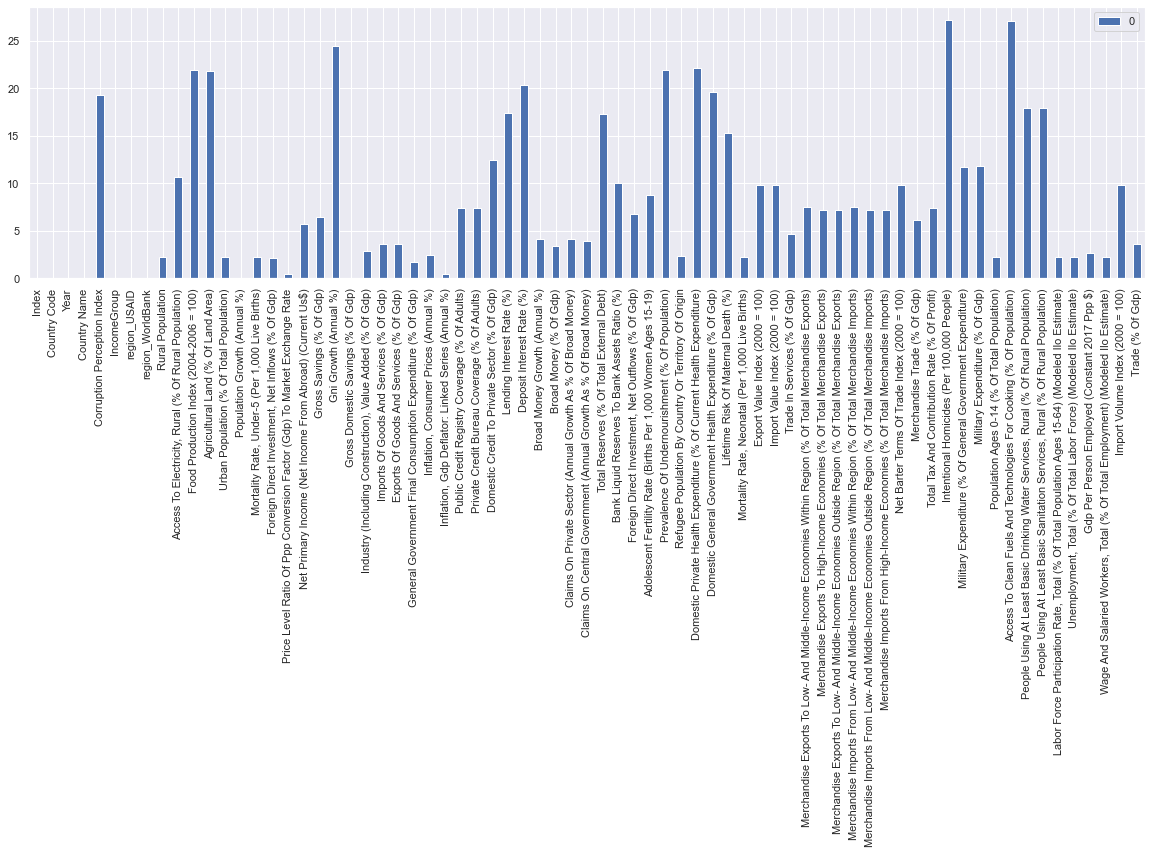

In [57]:
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))